# FINM 250 - TA Review 4 - Predictive Regressions
## Tobias Rodriguez del Pozo

**Note** Most of the material in this review is going over HW3 and HW4, the solutions to which can be found in the solutions folder of the GitHub repo.

## 1. Midterm Tips

- **Understand the Homework**: The goal of the midterm is not to trick you, or ask you questions you have no idea how to answer. Instead, the midterm is solely based on your understanding of the material seen in the homework and in class. So, really make sure you understand what (a) my code is doing, (b) what the homework questions are asking, and (c) what the content we have covered in class is about.
- **Make a Template**: I strongly suggest making a midterm Jupyter Notebook template. This template should already have your name, any helper functions you'll need, and any imports you'll need. This will save you valuable time when it comes time to take the midterm, since you won't need to worry at all about your coding environment.
- **Answer What is Asked**: For a lot of the conceptual questions, you can achieve full-marks on them in 1-2 succint sentences. Really try to answer the question: if it's a True/False question, say either True or False, not "both". You don't need to write paragraphs for these questions.
- **Low-Hanging Fruit**: In contrast to some exams you might have taken before, the midterm does not necessarily get harder the further you progress into it. Therefore, you should aim to answer as many questions as possible, even if they are not in order. If you're stuck on a question, quickly move on to the next one and come back to it later. Don't think that because you're stuck on Q1, then Q3 will be even harder.

## 2. Regression Recap:

$$
y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p + \epsilon
$$

## 3. Predictive Regressions

Idea:

$$
y_{t+1} = \beta_0 + \beta_1 X_{1,t} + \beta_2 X_{2,t} + ... + \beta_p X_{p,t} + \epsilon_{t+1}
$$

In [1]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# This is a new trick that we can use to import modules from other directories.
import sys

# We append it to "path" meaning that Python will look in this directory when we try to import modules.
# Note that ".." means go up one directory, and then we go into the "cmds" directory.
sys.path.append("../cmds")

# Auto reload modules.
%load_ext autoreload
%autoreload 2

# Plotting settings.
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.style.use("ggplot")

pd.set_option("display.float_format", lambda x: "{:.4f}".format(x))

ADJ = 12
returns = pd.read_excel(
    "../data/gmo_analysis_data.xlsx",
    sheet_name="total returns",
    index_col=0,
    parse_dates=[0],
)

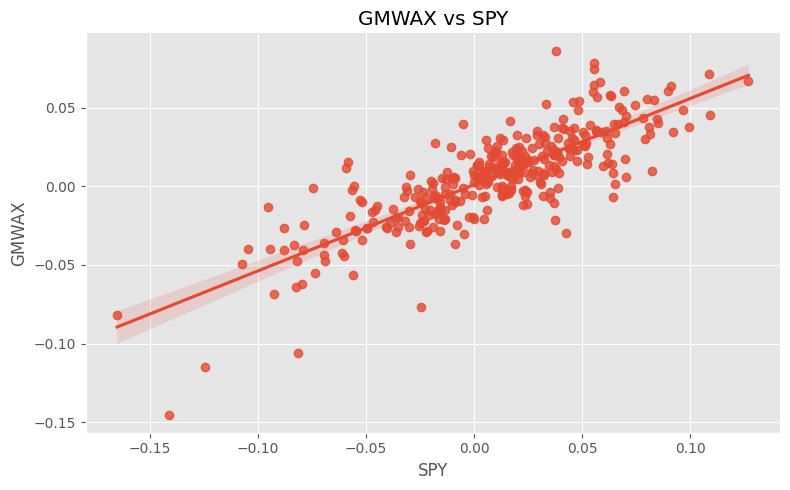

In [2]:
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.regplot(
    x=returns["SPY"],
    y=returns["GMWAX"],
)
ax.set_title("GMWAX vs SPY")
fig.tight_layout()

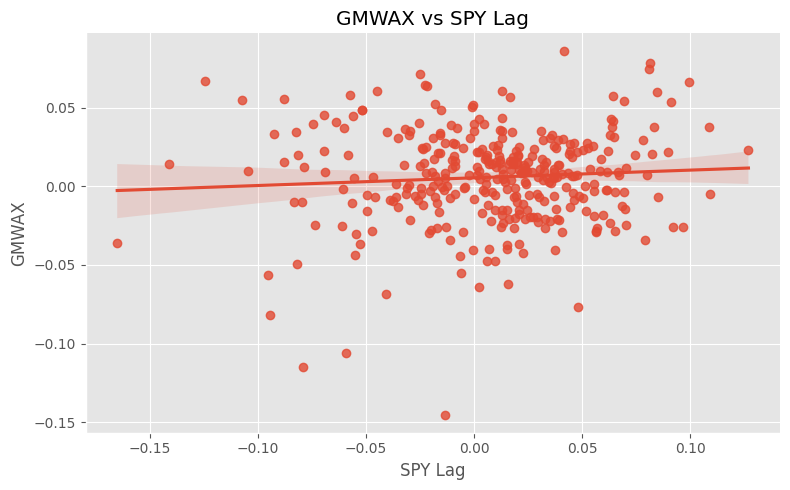

In [3]:
# Lag SPY by 1 month.
fig, ax = plt.subplots(figsize=(8, 5))
returns["SPY Lag"] = returns["SPY"].shift(1)

ax = sns.regplot(
    x=returns["SPY Lag"],
    y=returns["GMWAX"],
)
ax.set_title("GMWAX vs SPY Lag")
fig.tight_layout()

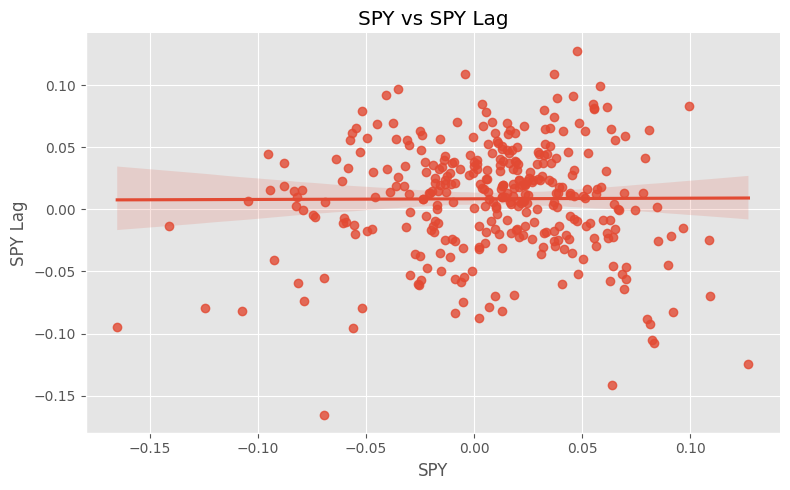

In [4]:
# Compare spy with spy lag.
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.regplot(
    x=returns["SPY"],
    y=returns["SPY Lag"],
)

ax.set_title("SPY vs SPY Lag")
fig.tight_layout()

In [5]:
# Calculate the regression of GMWAX on SPY.
X = sm.add_constant(returns["SPY"])
y = returns["GMWAX"]
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  GMWAX   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     711.2
Date:                Sat, 12 Jul 2025   Prob (F-statistic):           1.95e-85
Time:                        15:55:35   Log-Likelihood:                 914.01
No. Observations:                 343   AIC:                            -1824.
Df Residuals:                     341   BIC:                            -1816.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.060      0.290      -0.001       0.003
SPY            0.5476      0.021     26.668      0.000       0.507       0.588
==============================================================================
Omnibus:                       27.514   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.822
Skew:                          -0.284   Prob(JB):                     1.04e-18
Kurtosis:                       5.339   Cond. No.                         22.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# Looks pretty good -- what happens if we lag SPY?
X = sm.add_constant(returns["SPY Lag"])
model = sm.OLS(y, X, missing="drop").fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  GMWAX   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.843
Date:                Sat, 12 Jul 2025   Prob (F-statistic):              0.176
Time:                        15:55:35   Log-Likelihood:                 719.54
No. Observations:                 342   AIC:                            -1435.
Df Residuals:                     340   BIC:                            -1427.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0054      0.002      3.289      0.001       0.002       0.009
SPY Lag        0.0489      0.036      1.357      0.176      -0.022       0.120
==============================================================================
Omnibus:                       47.635   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.878
Skew:                          -0.677   Prob(JB):                     2.53e-26
Kurtosis:                       5.537   Cond. No.                         22.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

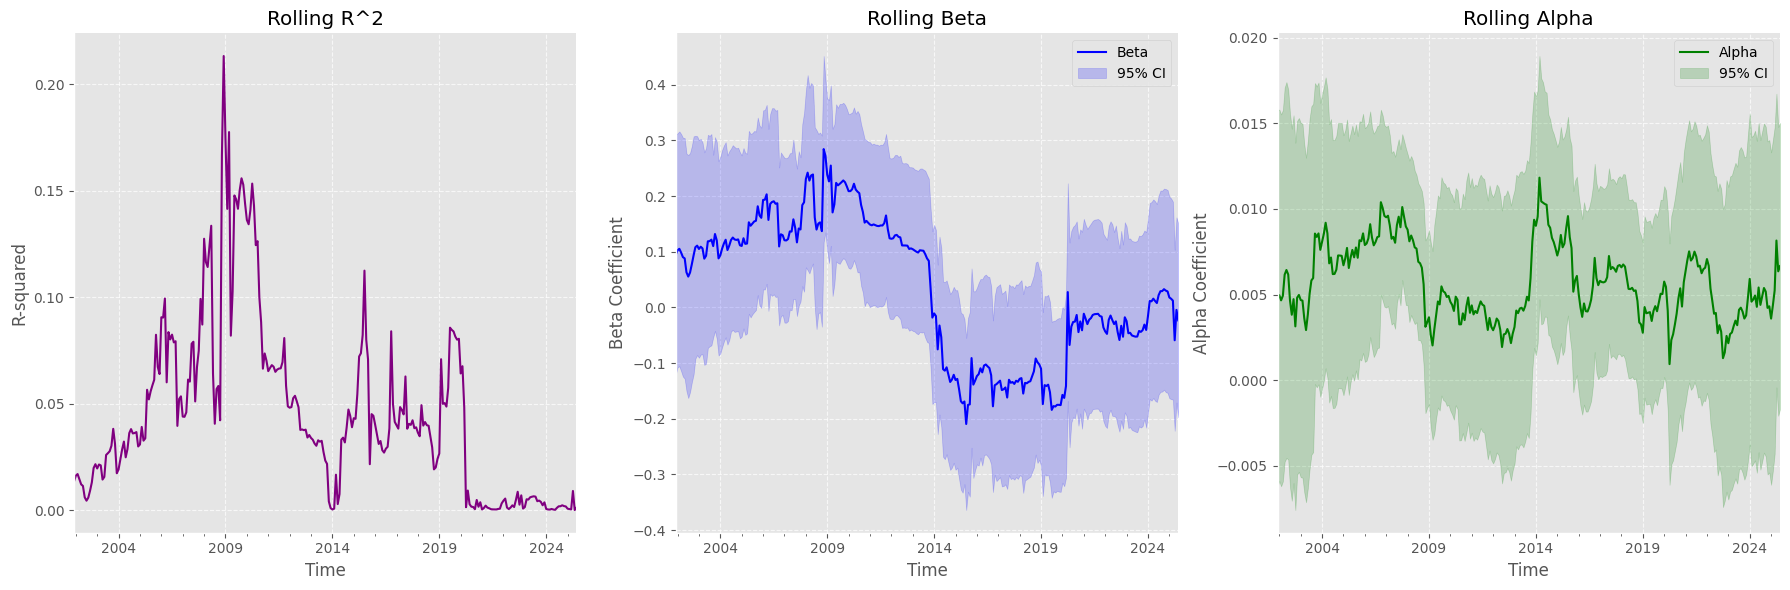

Rolling Regression Summary (first 5 rows):
              R^2   Beta  Alpha  Beta_CI_lower  Beta_CI_upper  Alpha_CI_lower  \
date                                                                            
2001-12-31 0.0135 0.0949 0.0047        -0.1204         0.3102         -0.0062   
2002-01-31 0.0162 0.1026 0.0050        -0.1077         0.3129         -0.0059   
2002-02-28 0.0169 0.1053 0.0047        -0.1055         0.3162         -0.0062   
2002-03-29 0.0146 0.0985 0.0049        -0.1145         0.3115         -0.0059   
2002-04-30 0.0121 0.0904 0.0062        -0.1241         0.3049         -0.0048   

            Alpha_CI_upper  Predicted Returns  Actual Returns  
date                                                           
2001-12-31          0.0157             0.0060          0.0434  
2002-01-31          0.0158             0.0130          0.0294  
2002-02-28          0.0155             0.0053          0.0012  
2002-03-29          0.0158             0.0040          0.0276  
2002-

In [ ]:
from collections import defaultdict

# Initialize defaultdict to store results
summary = defaultdict(list)

# Perform rolling regression
for i in range(60, len(returns)):
    # Define the window for X (independent variable) and y (dependent variable)
    X = sm.add_constant(returns["SPY Lag"].iloc[i - 60 : i])
    y = returns["GMWAX"].iloc[i - 60 : i]

    # Fit the OLS model
    model = sm.OLS(y, X, missing="drop").fit()

    # Append R^2, Beta, and Alpha
    summary["R^2"].append(model.rsquared)
    summary["Beta"].append(model.params.iloc[1])
    summary["Alpha"].append(model.params.iloc[0])

    # Get confidence intervals for Beta and Alpha
    # model.conf_int() returns a DataFrame where the first row is for the constant (Alpha)
    # and the second row is for the 'SPY Lag' coefficient (Beta).
    # The columns are [lower_bound, upper_bound].
    beta_ci = model.conf_int().iloc[1]  # Get the row for Beta's CI
    alpha_ci = model.conf_int().iloc[0]  # Get the row for Alpha's CI

    summary["Beta_CI_lower"].append(beta_ci[0])
    summary["Beta_CI_upper"].append(beta_ci[1])
    summary["Alpha_CI_lower"].append(alpha_ci[0])
    summary["Alpha_CI_upper"].append(alpha_ci[1])

    # Calculate and append predicted and actual returns
    summary["Predicted Returns"].append(model.predict(X).iloc[-1])
    summary["Actual Returns"].append(y.iloc[-1])

# Convert the summary dictionary to a pandas DataFrame
# The index of the summary DataFrame should align with the end of each rolling window
summary = pd.DataFrame(summary, index=returns.index[60:])

# Make 1x3 plot of rolling R^2, beta, and alpha with confidence intervals
fig, ax = plt.subplots(
    1, 3, figsize=(18, 6)
)  # Increased figure size for better readability

# Plot Rolling R^2
summary["R^2"].plot(ax=ax[0], title="Rolling R^2", color="purple")
ax[0].set_xlabel("Time")
ax[0].set_ylabel("R-squared")
ax[0].grid(True, linestyle="--", alpha=0.7)


# Plot Rolling Beta with Confidence Interval
summary["Beta"].plot(ax=ax[1], title="Rolling Beta", color="blue", label="Beta")
# Fill between the lower and upper confidence bounds for Beta
ax[1].fill_between(
    summary.index,
    summary["Beta_CI_lower"],
    summary["Beta_CI_upper"],
    color="blue",
    alpha=0.2,
    label="95% CI",
)
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Beta Coefficient")
ax[1].grid(True, linestyle="--", alpha=0.7)
ax[1].legend()  # Show legend for Beta and its CI


# Plot Rolling Alpha with Confidence Interval
summary["Alpha"].plot(ax=ax[2], title="Rolling Alpha", color="green", label="Alpha")
# Fill between the lower and upper confidence bounds for Alpha
ax[2].fill_between(
    summary.index,
    summary["Alpha_CI_lower"],
    summary["Alpha_CI_upper"],
    color="green",
    alpha=0.2,
    label="95% CI",
)
ax[2].set_xlabel("Time")
ax[2].set_ylabel("Alpha Coefficient")
ax[2].grid(True, linestyle="--", alpha=0.7)
ax[2].legend()  # Show legend for Alpha and its CI

plt.tight_layout()  # Adjust layout to prevent overlapping titles/labels
plt.show()